In [32]:
# import libraries
import pandas as pd
import numpy as np
import os

In [33]:
# import csv file
df = pd.read_csv('Archive/df_product.csv')

In [34]:
df

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,...,total_profit,avg_profit_per_order,avg_orders_per_month,avg_discount_per_order,first_order_month,first_order_year,first_order_year_month,PLC_Category,avg_mth_profit_contribution,avg_mth_profit_contribution_category
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Furniture,Bookcases,2017-09-04,2017-09-04,0,0,117,9,...,-117.8820,-117.882000,0.250000,0.300000,9,2017,2017-09,2_GROWTH,-30.226154,1_Low
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,...,24.1960,8.065333,0.079787,0.100000,11,2014,2014-11,5_OBSOLETE,0.794179,3_High
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,Furniture,Bookcases,2014-05-26,2016-06-04,740,740,574,14,...,311.1836,62.236720,0.114155,0.130000,5,2014,2014-05,5_OBSOLETE,12.615551,3_High
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2014-08-08,2017-12-19,1229,1229,11,21,...,-133.1092,-22.184867,0.145161,0.183333,8,2014,2014-08,3_MATURITY,-3.249207,1_Low
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",Furniture,Bookcases,2014-06-14,2014-08-19,66,66,1229,12,...,229.9752,114.987600,0.046332,0.000000,6,2014,2014-06,5_OBSOLETE,104.534182,3_High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,...,87.3705,29.123500,0.070978,0.133333,7,2014,2014-07,3_MATURITY,2.115508,1_Low
1890,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,...,130.6305,26.126100,0.110051,0.120000,4,2014,2014-04,5_OBSOLETE,3.845844,2_Medium
1891,TEC-PH-10004924,"SKILCRAFT Telephone Shoulder Rest, 2"" x 6.5"" x...",Technology,Phones,2015-10-23,2016-08-20,302,302,497,8,...,13.0064,4.335467,0.112641,0.066667,10,2015,2015-10,5_OBSOLETE,1.292026,1_Low
1892,TEC-PH-10004959,Classic Ivory Antiqueï¾ Telephoneï¾ ZL1810,Technology,Phones,2014-11-11,2015-09-03,296,296,849,4,...,40.1960,20.098000,0.052402,0.100000,11,2014,2014-11,5_OBSOLETE,4.073919,2_Medium


In [35]:
# eliminate columns in dataframe df
# rename 'total_profit' to 'Amount', 'count_orders' to 'Frequency', 'days_since_last_sale' to 'Recency'

df = df.rename(columns={
    'total_profit': 'Amount',
    'count_orders': 'Frequency',
    'days_since_last_sale': 'Recency'
})


# Open question: total profit is maybe not fair for more recent or expensive products, hence average profit contribution per month potentially more fair


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   product_id                            1894 non-null   object 
 1   product_name                          1894 non-null   object 
 2   category                              1894 non-null   object 
 3   subcategory                           1894 non-null   object 
 4   product_date_first_sale               1894 non-null   object 
 5   product_date_last_sale                1894 non-null   object 
 6   product_selling_days_f2l              1894 non-null   int64  
 7   product_selling_days_f2l_l            1894 non-null   int64  
 8   Recency                               1894 non-null   int64  
 9   total_quantity                        1894 non-null   int64  
 10  Frequency                             1894 non-null   int64  
 11  count_orders_disc

Feature selection / elimination

In [37]:
# use PFA


In [38]:
# Elimination of columns
# Drop all object columns except 'product_id'
cols_to_drop = [col for col in df.select_dtypes(include='object').columns if col != 'product_id']
df = df.drop(columns=cols_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_id                   1894 non-null   object 
 1   product_selling_days_f2l     1894 non-null   int64  
 2   product_selling_days_f2l_l   1894 non-null   int64  
 3   Recency                      1894 non-null   int64  
 4   total_quantity               1894 non-null   int64  
 5   Frequency                    1894 non-null   int64  
 6   count_orders_discount        1894 non-null   int64  
 7   discount_ratio               1894 non-null   float64
 8   Amount                       1894 non-null   float64
 9   avg_profit_per_order         1894 non-null   float64
 10  avg_orders_per_month         1894 non-null   float64
 11  avg_discount_per_order       1894 non-null   float64
 12  first_order_month            1894 non-null   int64  
 13  first_order_year  

In [47]:
df = df[['product_id', 'Frequency', 'Recency', 'Amount']]
df

,product_id,Frequency,Recency,Amount
0,FUR-BO-10000112,1,117,-117.8820
1,FUR-BO-10000330,3,214,24.1960
2,FUR-BO-10000362,5,574,311.1836
3,FUR-BO-10000468,6,11,-133.1092
4,FUR-BO-10001337,10,203,-78.6370
...,...,...,...,...
1416,TEC-PH-10004897,7,273,-38.9610
1417,TEC-PH-10004908,7,48,178.4790
1418,TEC-PH-10004912,3,29,87.3705
1419,TEC-PH-10004922,5,344,130.6305


Outlier treatment

In [ ]:
# copy from wine or bike data set or Copilot (1.5 IQR)
# Outlier treatment using 1.5*IQR rule for each numerical column
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.reset_index(drop=True, inplace=True)

df

# Comment: Takes out 857 rows out of 1894 rows (~45% of the data), if applied with all numerical columns still included
# Comment: Takes out 473 rows out of 1894 rows (~25% of the data), if applied with all numerical columns still included


,product_id,Frequency,Recency,Amount
0,FUR-BO-10000112,1,117,-117.8820
1,FUR-BO-10000330,3,214,24.1960
2,FUR-BO-10000362,5,574,311.1836
3,FUR-BO-10000468,6,11,-133.1092
4,FUR-BO-10001337,10,203,-78.6370
...,...,...,...,...
1416,TEC-PH-10004897,7,273,-38.9610
1417,TEC-PH-10004908,7,48,178.4790
1418,TEC-PH-10004912,3,29,87.3705
1419,TEC-PH-10004922,5,344,130.6305


Attention : Limit to less columns first, and the IQR -> Anticipated effect: less records deleted.

Scaling

In [41]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from yellowbrick.cluster import SilhouetteVisualizer

In [42]:
from sklearn.preprocessing import StandardScaler

# Rescaling the attributes
rfm_df = df[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()


,Amount,Frequency,Recency
0,-2.133410,-1.827977,-0.169344
1,-0.419410,-0.980626,0.515410
2,3.042751,-0.133274,3.056768
3,-2.317108,0.290401,-0.917633
4,-1.659967,1.985104,0.437758


Building the model

In [43]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from yellowbrick.cluster import SilhouetteVisualizer

In [44]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)


c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [49]:
from collections import Counter

# Assign the labels to each data point, and execute the following script.
kmeans.labels_
label_list = kmeans.labels_
sorted(Counter(label_list).items())


[(0, 456), (1, 183), (2, 282), (3, 500)]

c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

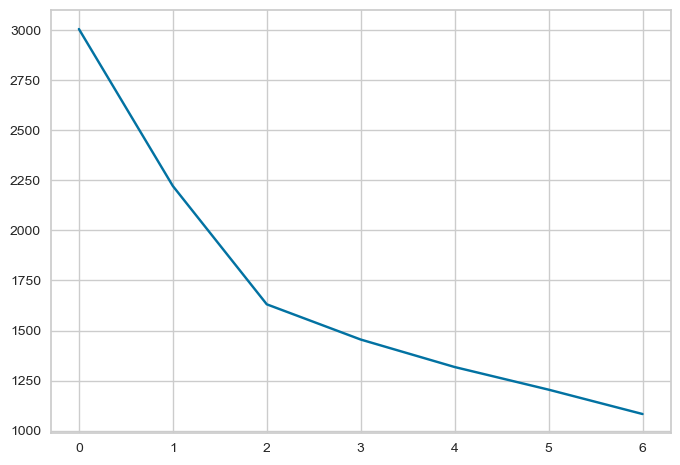

In [51]:
import matplotlib.pyplot as plt

# Elbow-curve /SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)


In [52]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

For n_clusters=2, the silhouette score is 0.3311817815236859
For n_clusters=3, the silhouette score is 0.30700269252233325


c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters=4, the silhouette score is 0.3346481226628046
For n_clusters=5, the silhouette score is 0.2802573843482618


c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

For n_clusters=6, the silhouette score is 0.27757189416546363
For n_clusters=7, the silhouette score is 0.2903949760730275


c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

For n_clusters=8, the silhouette score is 0.2897730015100377


Train the model

In [54]:
# assign the label
rfm_df_scaled['Cluster_Id'] = kmeans.labels_
rfm_df_scaled.head()


,Amount,Frequency,Recency,Cluster_Id
0,-2.133410,-1.827977,-0.169344,7
1,-0.419410,-0.980626,0.515410,4
2,3.042751,-0.133274,3.056768,6
3,-2.317108,0.290401,-0.917633,7
4,-1.659967,1.985104,0.437758,5


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

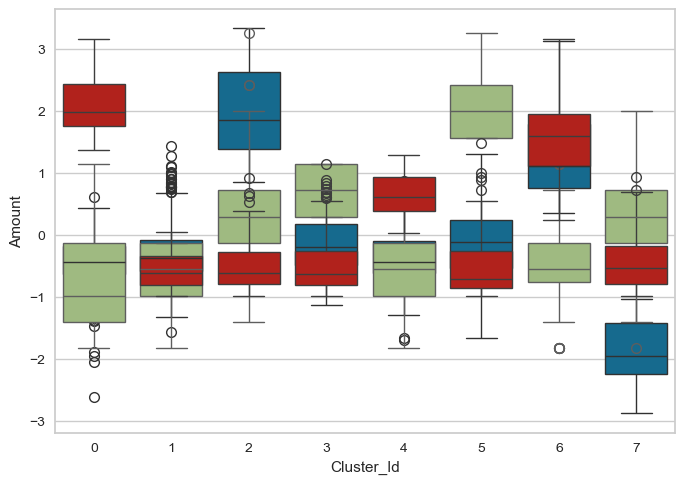

In [56]:
import seaborn as sns

# Box plot to visualize Cluster Id vs Amount
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm_df_scaled)

# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_df_scaled)

# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_df_scaled)
